<a href="https://colab.research.google.com/github/MohammadFatih/Cohort-Analysis/blob/main/Cohort_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

data = pd.read_csv("cohorts.csv")
print(data.head())

         Date  New users  Returning users  Duration Day 1  Duration Day 7
0  25/10/2023       3461             1437      202.156977      162.523809
1  26/10/2023       3777             1554      228.631944      258.147059
2  27/10/2023       3100             1288      227.185841      233.550000
3  28/10/2023       2293              978      261.079545      167.357143
4  29/10/2023       2678             1082      182.567568      304.350000


In [ ]:
missing_values = data.isnull().sum()
print(missing_values)

Date               0
New users          0
Returning users    0
Duration Day 1     0
Duration Day 7     0
dtype: int64


In [ ]:
data_types = data.dtypes
print(data_types)

Date                object
New users            int64
Returning users      int64
Duration Day 1     float64
Duration Day 7     float64
dtype: object


In [ ]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

In [ ]:
# Display the descriptive statistics of the dataset
descriptive_status = data.describe()
print(descriptive_status)

         New users  Returning users  Duration Day 1  Duration Day 7
count    30.000000        30.000000       30.000000       30.000000
mean   3418.166667      1352.866667      208.259594      136.037157
std     677.407486       246.793189       64.730830       96.624319
min    1929.000000       784.000000       59.047619        0.000000
25%    3069.000000      1131.500000      182.974287       68.488971
50%    3514.500000      1388.000000      206.356554      146.381667
75%    3829.500000      1543.750000      230.671046      220.021875
max    4790.000000      1766.000000      445.872340      304.350000


In [ ]:
import plotly.graph_objects as go
import plotly.express as px

import plotly.io as pio
pio.templates.default = "plotly_white"

# Trend analysis for new and returning users
fig = go.Figure()

# New Users
fig.add_trace(go.Scatter(x = data['Date'], y = data['New users'], mode = 'lines+markers', name = 'New users'))

# Returning Users
fig.add_trace(go.Scatter( x = data['Date'], y = data['Returning users'], mode= 'lines+markers', name = 'Returning users'))

#Update layout
fig.update_layout(title ='Trend of new returning users Over Time',
                  xaxis_title ='Date',
                  yaxis_title = 'Number of Users')
fig.show()

In [ ]:
fig = px.line(data_frame=data, x='Date', y=['Duration Day 1', 'Duration Day 7'], markers=True, labels={'value': 'Duration'})
fig.update_layout(title='Trend of Duration (Day 1 and Day 7) Over Time', xaxis_title='Date', yaxis_title='Duration', xaxis=dict(tickangle=-45))
fig.show()

<ipython-input-13-4b2e11a223d6>:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



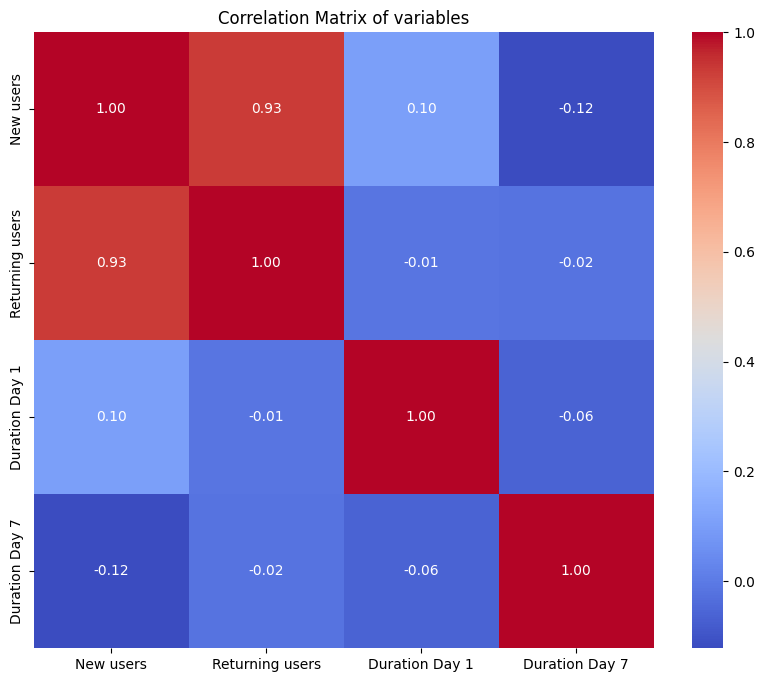

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#Correlation matrix
correlation_matrix = data.corr()

#Plotting the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot = True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of variables')
plt.show()

In [ ]:
# Grouping data by week
data['Week'] = data['Date'].dt.isocalendar().week

# Calculating weekly averages
weekly_averages = data.groupby('Week').agg({
    'New users': 'mean',
    'Returning users': 'mean',
    'Duration Day 1': 'mean',
    'Duration Day 7': 'mean'
}).reset_index()

print(weekly_averages.head())

   Week    New users  Returning users  Duration Day 1  Duration Day 7
0    43  3061.800000      1267.800000      220.324375      225.185602
1    44  3503.571429      1433.142857      189.088881      168.723200
2    45  3297.571429      1285.714286      198.426524      143.246721
3    46  3222.428571      1250.000000      248.123542      110.199609
4    47  4267.750000      1616.250000      174.173330        0.000000


In [ ]:
fig1 = px.line(weekly_averages, x='Week', y=['New users', 'Returning users'], markers=True,
               labels={'value': 'Average Number of Users'}, title='Weekly Average of New vs. Returning Users')
fig1.update_xaxes(title ='Week of the year')
fig1.update_yaxes(title = 'Average number of users')

fig2 = px.line(weekly_averages, x='Week', y=['Duration Day 1', 'Duration Day 7'], markers=True,
               labels={'value':'Average Duration'}, title='weekly Average of Duration (Day 1 vs. Day 7)')
fig2.update_xaxes(title = 'Week of the year')
fig2.update_yaxes(title = 'Average Duration')

fig1.show()
fig2.show()

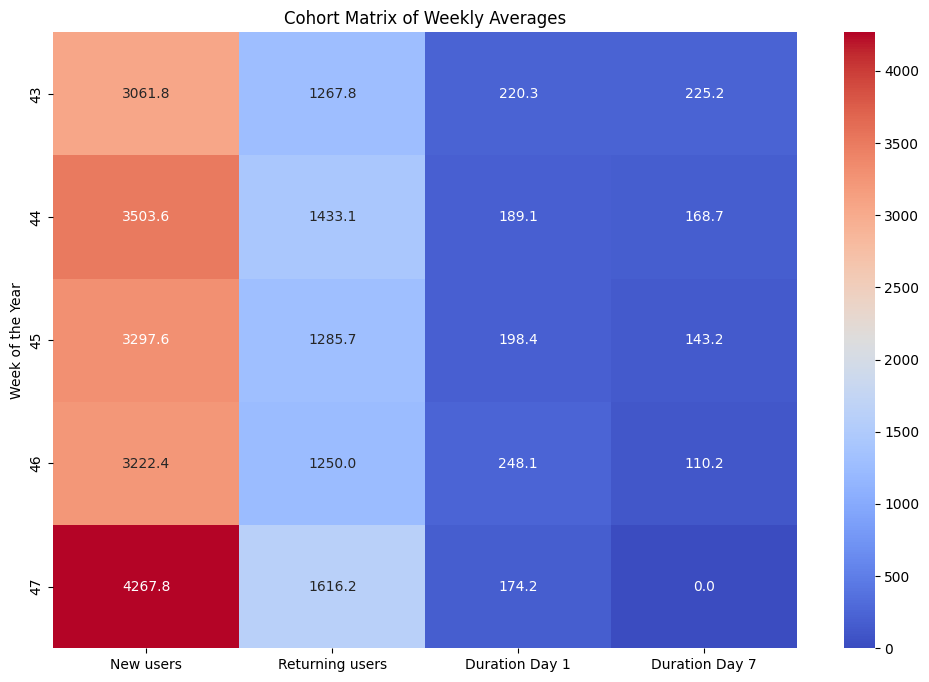

In [ ]:
# Creating a cohort matrix
cohort_matrix = weekly_averages.set_index('Week')

# Plotting the cohort matrix
plt.figure(figsize=(12, 8))

sns.heatmap(cohort_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Cohort Matrix of Weekly Averages')
plt.ylabel('Week of the Year')
plt.show()